In [109]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score


In [5]:
ccm_analytics= pd.read_csv('CCM_Analytics.csv')
ccm_analytics.head()

,DateOfGame,Opponent,TotalPoint,FirstHalfPoint,FirstHalfFieldGoalAttempts,FirstHalfFieldGoalsMade,SecondHalfPoint,SecondHalfFieldGoalAttempts,SecondHalfFieldGoalsMade,FreeThrowsAttemptedFirstHalf,...,PointsPerAttemptGuardedTotal,2PointFieldGoal-PointsPerAttemptTotal,3PointFieldGoals-PointsPerAttemptTotal,2PointFieldGoalOpen-PointsPerAttemptsTotal,2PointFieldGoalGuarded-PointsPerAttemptTotal,3PointFieldGoalOpen-PointPerAttemptTotal,3PointFieldGoalGuarded-PointPerAttemptTotal,Assists,KaukaunaPointsScored,WinOrLoss
0,1/19/2021,GB SouthWest,26,11,6,3,15,9,6,2,...,1.166667,1.666667,1.333333,2,1.600000,3,0.857143,6,93,Win
1,1/22/2021,Hortonville,8,7,6,0,1,6,2,2,...,0.222222,0.400000,0.428571,0,0.500000,1.5,0.000000,7,96,Win
2,1/23/2021,Appleton West,25,15,12,5,10,6,3,0,...,1.000000,0.500000,1.615385,#DIV/0!,0.500000,1.714285714,1.285714,11,99,Win
3,12/8/2020,Appleton East,40,10,10,4,30,12,8,2,...,1.210526,1.294118,0.600000,2,1.250000,0,1.000000,6,86,Win
4,1/29/2021,Kimberly,20,10,8,3,10,11,4,2,...,0.666667,0.800000,1.000000,0,0.888889,1.5,0.000000,7,65,Loss


In [7]:
# Check to see if any columns do not have a value 
ccm_analytics.isna().sum()

DateOfGame                                      0
Opponent                                        0
TotalPoint                                      0
FirstHalfPoint                                  0
FirstHalfFieldGoalAttempts                      0
FirstHalfFieldGoalsMade                         0
SecondHalfPoint                                 0
SecondHalfFieldGoalAttempts                     0
SecondHalfFieldGoalsMade                        0
FreeThrowsAttemptedFirstHalf                    0
FreeThrowsMadeFirstHalf                         0
FreeThrowsAttemptedSecondHalf                   0
FreeThrowsMadeSecondHalf                        0
FreeThrowsAttemptedTotal                        0
FreeThrowsMadeTotal                             0
FieldGoalsAttemptedTotal                        0
FieldGoalsMadeTotal                             0
2PointFieldGoalsAttemptedTotal                  0
2PointFieldGoalsMadeTotal                       0
3PointFieldGoalsAttemptedTotal                  0


In [9]:
# Checking to see if any are null
ccm_analytics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 47 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   DateOfGame                                    10 non-null     object 
 1   Opponent                                      10 non-null     object 
 2   TotalPoint                                    10 non-null     int64  
 3   FirstHalfPoint                                10 non-null     int64  
 4   FirstHalfFieldGoalAttempts                    10 non-null     int64  
 5   FirstHalfFieldGoalsMade                       10 non-null     int64  
 6   SecondHalfPoint                               10 non-null     int64  
 7   SecondHalfFieldGoalAttempts                   10 non-null     int64  
 8   SecondHalfFieldGoalsMade                      10 non-null     int64  
 9   FreeThrowsAttemptedFirstHalf                  10 non-null     int64 

In [11]:
#Replace #DIV/0! error with 0 (Cleaning data)
ccm_analytics = ccm_analytics.replace('#DIV/0!', 0)

In [13]:
# Get the names of all the columns
ccm_analytics.describe().columns

Index(['TotalPoint', 'FirstHalfPoint', 'FirstHalfFieldGoalAttempts',
       'FirstHalfFieldGoalsMade', 'SecondHalfPoint',
       'SecondHalfFieldGoalAttempts', 'SecondHalfFieldGoalsMade',
       'FreeThrowsAttemptedFirstHalf', 'FreeThrowsMadeFirstHalf',
       'FreeThrowsAttemptedSecondHalf', 'FreeThrowsMadeSecondHalf',
       'FreeThrowsAttemptedTotal', 'FreeThrowsMadeTotal',
       'FieldGoalsAttemptedTotal', 'FieldGoalsMadeTotal',
       '2PointFieldGoalsAttemptedTotal', '2PointFieldGoalsMadeTotal',
       '3PointFieldGoalsAttemptedTotal', '3PointFieldGoalsMadeTotal',
       'FieldGoalsAttemptedOpenTotal', 'FieldGoalsMadeOpenTotal',
       'FieldGoalsAttemptedGuardedTotal', 'FieldGoalsMadeGuardedTotal',
       '2PointFieldGoalsAttemptedOpenTotal', '2PointFieldGoalsMadeOpenTotal',
       '2PointFieldGoalsAttemptedGuardedTotal',
       '2PointFieldGoalsMadeGuardedTotal ',
       '3PointFieldGoalsAttemptedOpenTotal', '3PointFieldGoalsMadeOpenTotal',
       '3PointFieldGoalsAttemptetGua

In [15]:
# Seperate Numerical and Categorical data
df_num = ccm_analytics.drop(columns = ['DateOfGame', 'Opponent', 'WinOrLoss'])
df_num

,TotalPoint,FirstHalfPoint,FirstHalfFieldGoalAttempts,FirstHalfFieldGoalsMade,SecondHalfPoint,SecondHalfFieldGoalAttempts,SecondHalfFieldGoalsMade,FreeThrowsAttemptedFirstHalf,FreeThrowsMadeFirstHalf,FreeThrowsAttemptedSecondHalf,...,PointsPerAttemptOpenTotal,PointsPerAttemptGuardedTotal,2PointFieldGoal-PointsPerAttemptTotal,3PointFieldGoals-PointsPerAttemptTotal,2PointFieldGoalOpen-PointsPerAttemptsTotal,2PointFieldGoalGuarded-PointsPerAttemptTotal,3PointFieldGoalOpen-PointPerAttemptTotal,3PointFieldGoalGuarded-PointPerAttemptTotal,Assists,KaukaunaPointsScored
0,26,11,6,3,15,9,6,2,2,2,...,2.666666667,1.166667,1.666667,1.333333,2,1.600000,3,0.857143,6,93
1,8,7,6,0,1,6,2,2,2,2,...,1,0.222222,0.400000,0.428571,0,0.500000,1.5,0.000000,7,96
2,25,15,12,5,10,6,3,0,0,3,...,1.714285714,1.000000,0.500000,1.615385,0,0.500000,1.714285714,1.285714,11,99
3,40,10,10,4,30,12,8,2,2,13,...,0.666666667,1.210526,1.294118,0.600000,2,1.250000,0,1.000000,6,86
4,20,10,8,3,10,11,4,2,2,1,...,1.285714286,0.666667,0.800000,1.000000,0,0.888889,1.5,0.000000,7,65
5,16,7,4,2,9,4,2,2,2,4,...,0,1.571429,1.000000,1.500000,0,1.000000,0,1.800000,7,57
6,27,12,6,3,15,8,6,5,4,2,...,0,1.571429,1.428571,1.714286,0,1.428571,0,1.714286,11,78
7,33,13,11,5,20,12,8,0,0,4,...,1.833333333,1.176471,1.076923,1.500000,2,1.166667,1.8,1.200000,9,92
8,12,0,5,0,12,6,4,0,0,3,...,2.5,0.555556,1.000000,0.857143,2,0.666667,3,0.500000,6,66
9,28,18,7,7,10,7,2,1,1,8,...,2,1.300000,1.333333,1.800000,2,1.250000,2,1.500000,7,105


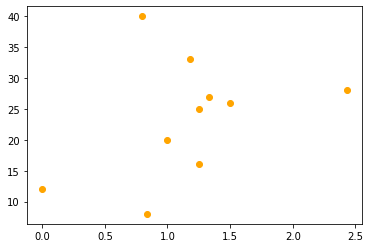

In [17]:
# Scatter Plots
plt.scatter(df_num.PointsPerAttemptFirstHalf.values, df_num.TotalPoint.values, marker ='o', color = 'orange')

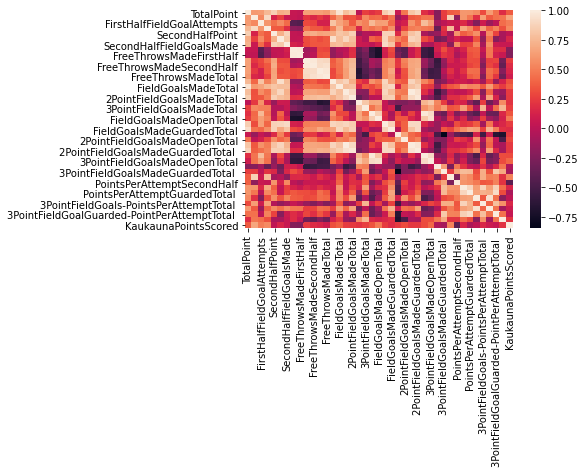

In [86]:
#Heat map correlations
shooting_correlation = df_num.corr()
sns.heatmap(shooting_correlation);

In [21]:
#Find correlations
shooting_correlation

,TotalPoint,FirstHalfPoint,FirstHalfFieldGoalAttempts,FirstHalfFieldGoalsMade,SecondHalfPoint,SecondHalfFieldGoalAttempts,SecondHalfFieldGoalsMade,FreeThrowsAttemptedFirstHalf,FreeThrowsMadeFirstHalf,FreeThrowsAttemptedSecondHalf,...,PointsPerAttemptFirstHalf,PointsPerAttemptSecondHalf,PointsPerAttemptTotal,PointsPerAttemptGuardedTotal,2PointFieldGoal-PointsPerAttemptTotal,3PointFieldGoals-PointsPerAttemptTotal,2PointFieldGoalGuarded-PointsPerAttemptTotal,3PointFieldGoalGuarded-PointPerAttemptTotal,Assists,KaukaunaPointsScored
TotalPoint,1.000000,0.615821,0.627708,0.755657,0.862523,0.704963,0.733613,0.053331,0.031629,0.648189,...,0.371699,0.382715,0.604552,0.599000,0.555981,0.303253,0.632168,0.450217,0.185624,0.362889
FirstHalfPoint,0.615821,1.000000,0.541340,0.912608,0.132476,0.261767,0.071139,0.047756,0.026552,0.224350,...,0.867853,-0.176845,0.599648,0.468529,0.199453,0.636883,0.365522,0.448609,0.472102,0.672915
FirstHalfFieldGoalAttempts,0.627708,0.541340,1.000000,0.603430,0.442004,0.554534,0.429280,-0.413520,-0.441438,0.296025,...,0.079392,0.067985,0.165401,-0.000195,-0.232639,0.087059,-0.128384,0.021014,0.437116,0.501130
FirstHalfFieldGoalsMade,0.755657,0.912608,0.603430,1.000000,0.364522,0.356122,0.191802,-0.174359,-0.198858,0.437601,...,0.767231,0.045672,0.682579,0.547637,0.311362,0.649078,0.400792,0.521195,0.326776,0.548103
SecondHalfPoint,0.862523,0.132476,0.442004,0.364522,1.000000,0.718747,0.877221,0.036422,0.022737,0.671355,...,-0.089767,0.595046,0.375424,0.452650,0.571344,-0.027534,0.560532,0.278270,-0.069686,0.024348
SecondHalfFieldGoalAttempts,0.704963,0.261767,0.554534,0.356122,0.718747,1.000000,0.827249,0.036812,0.046783,0.312755,...,-0.021041,0.131010,0.038501,0.047647,0.331364,-0.172602,0.448147,-0.219608,-0.075249,0.148354
SecondHalfFieldGoalsMade,0.733613,0.071139,0.429280,0.191802,0.877221,0.827249,1.000000,0.124623,0.092387,0.308816,...,-0.188961,0.549174,0.252026,0.279080,0.519789,-0.073071,0.564583,0.081574,0.060244,0.058786
FreeThrowsAttemptedFirstHalf,0.053331,0.047756,-0.413520,-0.174359,0.036422,0.036812,0.124623,1.000000,0.988439,-0.105274,...,0.161229,0.007281,0.130711,0.356899,0.366589,0.051590,0.477019,0.183584,0.181991,-0.226491
FreeThrowsMadeFirstHalf,0.031629,0.026552,-0.441438,-0.198858,0.022737,0.046783,0.092387,0.988439,1.000000,-0.072040,...,0.166147,-0.061505,0.067436,0.318356,0.352440,-0.025785,0.473353,0.119475,0.067457,-0.238144
FreeThrowsAttemptedSecondHalf,0.648189,0.224350,0.296025,0.437601,0.671355,0.312755,0.308816,-0.105274,-0.072040,1.000000,...,0.150004,0.059581,0.156382,0.314006,0.302289,-0.144953,0.264025,0.286505,-0.303780,0.247082


In [23]:
#Pivot table to see assits and point spread in first and second half
new_table = pd.pivot_table(ccm_analytics, index = 'TotalPoint', values = ['FirstHalfPoint', 'FirstHalfFieldGoalAttempts', 'FreeThrowsAttemptedFirstHalf', 'PointsPerAttemptFirstHalf'])
new_table

,FirstHalfFieldGoalAttempts,FirstHalfPoint,FreeThrowsAttemptedFirstHalf,PointsPerAttemptFirstHalf
TotalPoint,,,,
8,6,7,2,0.833333
12,5,0,0,0.000000
16,4,7,2,1.250000
20,8,10,2,1.000000
25,12,15,0,1.250000
26,6,11,2,1.500000
27,6,12,5,1.333333
28,7,18,1,2.428571
33,11,13,0,1.181818


In [25]:
# Going to machine learn to predict total points based on first half stats
y = ccm_analytics.TotalPoint
y


0    26
1     8
2    25
3    40
4    20
5    16
6    27
7    33
8    12
9    28
Name: TotalPoint, dtype: int64

In [27]:
# What to use from data to predict total points
ccm_features= ['FirstHalfPoint', 'FirstHalfFieldGoalAttempts', 'FreeThrowsAttemptedFirstHalf', 'PointsPerAttemptFirstHalf']


In [29]:
# Look at data to be used in prediction
X = ccm_analytics[ccm_features]
X.describe()

,FirstHalfPoint,FirstHalfFieldGoalAttempts,FreeThrowsAttemptedFirstHalf,PointsPerAttemptFirstHalf
count,10.000000,10.000000,10.000000,10.000000
mean,10.300000,7.500000,1.600000,1.157706
std,4.945256,2.677063,1.505545,0.612740
min,0.000000,4.000000,0.000000,0.000000
25%,7.750000,6.000000,0.250000,0.875000
50%,10.500000,6.500000,2.000000,1.215909
75%,12.750000,9.500000,2.000000,1.312500
max,18.000000,12.000000,5.000000,2.428571


In [31]:
# Look at first 5 values of prediction values
X.head()

,FirstHalfPoint,FirstHalfFieldGoalAttempts,FreeThrowsAttemptedFirstHalf,PointsPerAttemptFirstHalf
0,11,6,2,1.500000
1,7,6,2,0.833333
2,15,12,0,1.250000
3,10,10,2,0.800000
4,10,8,2,1.000000


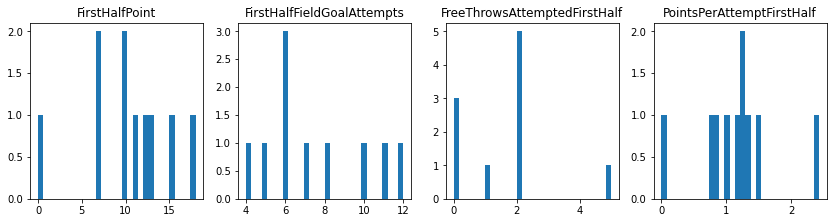

In [70]:
# See distributions for X values 
cols = list(X)
fig = plt.figure(figsize=(18, 11))
fig.tight_layout(pad=5.0)
for i in range(len(cols)):
    plt.subplot(3, 5, i+1)
    plt.hist(X[cols[i]], bins=30)
    plt.title(cols[i])

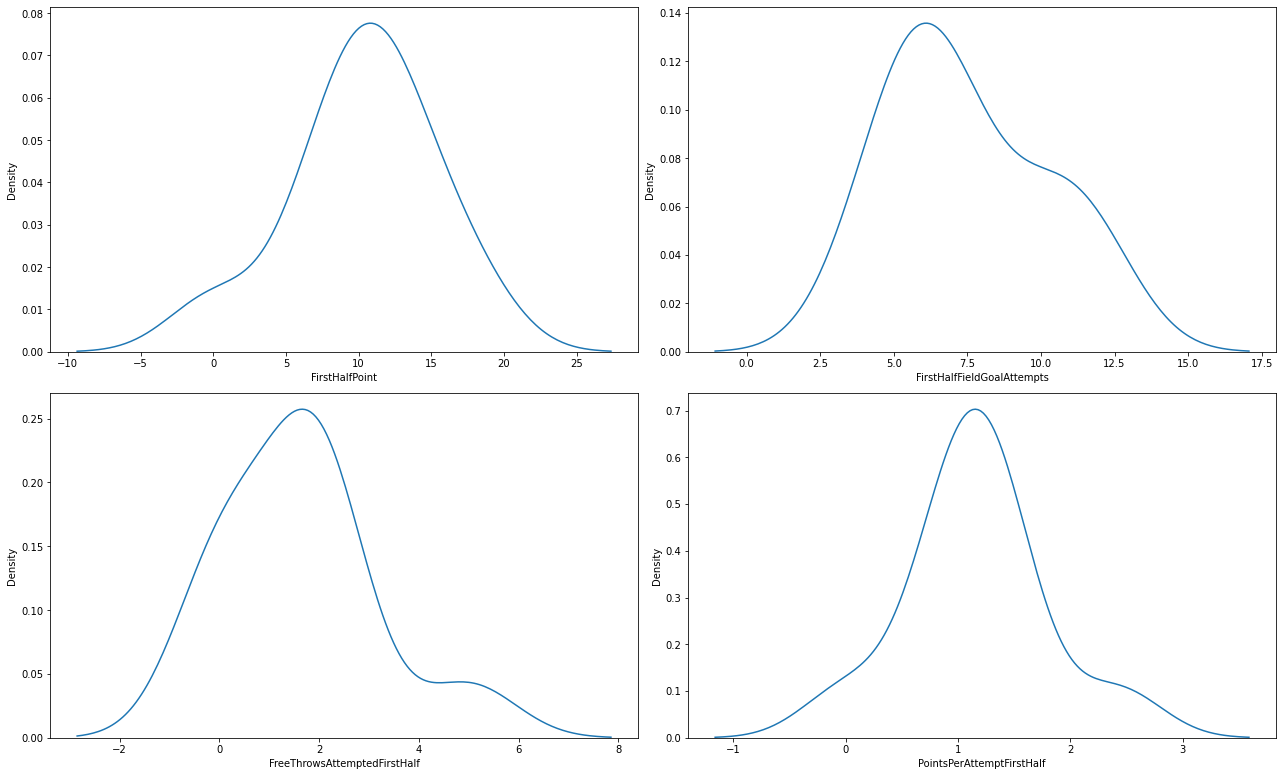

In [85]:

# Create a 3x5 matrix of subplots and add padding around them for readability.
fig, axes = plt.subplots(2, 2, figsize=(18, 11))
fig.tight_layout(pad=2.0)

# Loop over the columns of the DataFrame and create a KDE for each one.
for i in range(len(cols)):
    sns.kdeplot(ax=axes[i//2, i%2], data=X[cols[i]])

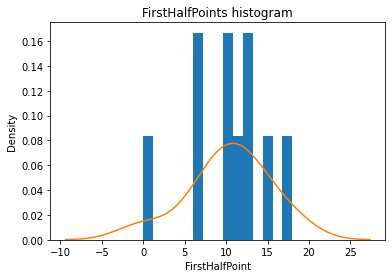

In [95]:
# Plot the KDE for 'FirstHalfPoints' over the probability-density histogram.
plt.hist(X['FirstHalfPoint'], density=True, bins=15)
plt.title('FirstHalfPoints histogram')
sns.kdeplot(X['FirstHalfPoint']);

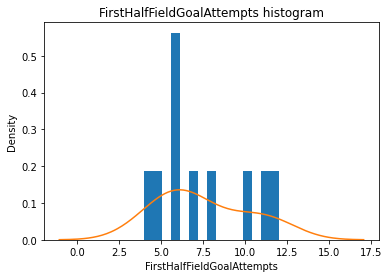

In [96]:
# Plot the KDE for 'FirstHalfFieldGoalAttempts' over the probability-density histogram.
plt.hist(X['FirstHalfFieldGoalAttempts'], density=True, bins=15)
plt.title('FirstHalfFieldGoalAttempts histogram')
sns.kdeplot(X['FirstHalfFieldGoalAttempts']);

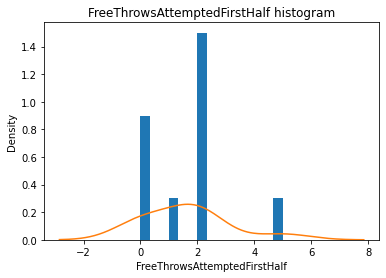

In [97]:
# Plot the KDE for 'FreeThrowsAttemptedFirstHalf' over the probability-density histogram.
plt.hist(X['FreeThrowsAttemptedFirstHalf'], density=True, bins=15)
plt.title('FreeThrowsAttemptedFirstHalf histogram')
sns.kdeplot(X['FreeThrowsAttemptedFirstHalf']);

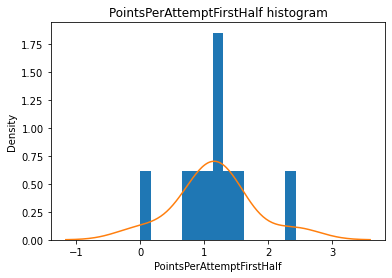

In [99]:
# Plot the KDE for 'PointsPerAttemptFirstHalf' over the probability-density histogram.
plt.hist(X['PointsPerAttemptFirstHalf'], density=True, bins=15)
plt.title('PointsPerAttemptFirstHalf histogram')
sns.kdeplot(X['PointsPerAttemptFirstHalf']);

In [35]:
# Used Decision Tree Regressor to split prediction values
from sklearn.tree import DecisionTreeRegressor
ccm_model = DecisionTreeRegressor(random_state = 1)
ccm_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [37]:
print("Making predictions for the following 5 games:")
print(X.head())
print("The predicitions are")
print(ccm_model.predict(X.head()))
print("Actual values:", y.head().values)

Making predictions for the following 5 games:
   FirstHalfPoint  FirstHalfFieldGoalAttempts  FreeThrowsAttemptedFirstHalf  \
0              11                           6                             2   
1               7                           6                             2   
2              15                          12                             0   
3              10                          10                             2   
4              10                           8                             2   

   PointsPerAttemptFirstHalf  
0                   1.500000  
1                   0.833333  
2                   1.250000  
3                   0.800000  
4                   1.000000  
The predicitions are
[26.  8. 25. 40. 20.]
Actual values: [26  8 25 40 20]


In [39]:
# Model validation 
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 1234)
print(train_X.shape, val_X.shape, train_y.shape, val_y.shape)
ccm_model = DecisionTreeRegressor()
ccm_model.fit(train_X, train_y)
val_predictions = ccm_model.predict(val_X)
print("Predicition values:", val_predictions)
print("Actual values:", val_y.values)
print("Mean absolute error: ", mean_absolute_error(val_y, val_predictions))

(8, 4) (2, 4) (8,) (2,)
Predicition values: [28. 28.]
Actual values: [33 25]
Mean absolute error:  4.0


In [41]:
# See if underfitting or overfitting and implement changes
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y) :
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state = 1234)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [43]:
# Setting different tree sizes
candidate_max_leaf_nodes = {5, 25, 50, 100, 250, 500}
scores = {leaf_size : get_mae(leaf_size, train_X, val_X, train_y, val_y) for leaf_size in candidate_max_leaf_nodes}

# Store the best value of max_leaf_nodes
best_tree_size = best_tree_size = min(scores, key = scores.get)

In [45]:
# Create final model
final_ccm_model = DecisionTreeRegressor(max_leaf_nodes = best_tree_size, random_state = 1234)
final_ccm_model.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=50, random_state=1234)

In [47]:
# Finding mean absolute error
final_ccm_model_prediction = final_ccm_model.predict(val_X)
print(mean_absolute_error(val_y, final_ccm_model_prediction))

0.0


In [49]:
# Using Random Forest and letting it iterate 400 times through the data 

rf_model = RandomForestRegressor(n_estimators = 400, random_state = 1234)
rf_model_fit = rf_model.fit(train_X, train_y)
ccm_rf_predict = rf_model_fit.predict(val_X)
print("Machine Learning Prediction val_X values:", val_X)
print("Machine Learning Prediction for val_y:", ccm_rf_predict)

print("Actual values for val_y: " ,val_y.values)

print("Mean absolute error:", mean_absolute_error(val_y, ccm_rf_predict))



Machine Learning Prediction val_X values:    FirstHalfPoint  FirstHalfFieldGoalAttempts  FreeThrowsAttemptedFirstHalf  \
7              13                          11                             0   
2              15                          12                             0   

   PointsPerAttemptFirstHalf  
7                   1.181818  
2                   1.250000  
Machine Learning Prediction for val_y: [30.2575 30.2575]
Actual values for val_y:  [33 25]
Mean absolute error: 4.0


In [51]:
# Create function for score_dataset
def score_dataset(train_X, val_x, train_y, val_y):
    model = RandomForestRegressor(n_estimators = 200, random_state = 1234)
    model.fit(train_X, train_y)
    preds = model.predict(val_X)
    return mean_absolute_error(val_y, preds)

In [53]:
# Create pipeline

my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', rf_model)
                             ])
my_pipeline.fit(train_X, train_y)
predict_pip = my_pipeline.predict(val_X)
score = mean_absolute_error(val_y, predict_pip)
print("MAE:", score)

MAE: 4.0


In [55]:
# Create cross validation score
scores = -1 * cross_val_score(my_pipeline, X, y, cv = 5, scoring = 'neg_mean_absolute_error')
print("MAE scores:\n", scores)

MAE scores:
 [ 9.2875  12.56875  6.06125  4.84     4.06875]


In [57]:
# Print average MAE score
print("Average MAE score (across experiments):")
print(scores.mean())

Average MAE score (across experiments):
7.365249999999999


In [59]:
# Use xgboost with early stopping rounds that stops running after 5 straight rounds of deteriorating validation scores. Learning rate lets us itterate more but not overfit the data by raising the learning rate(default is 0.01)

ccm_xgb_model = XGBRegressor(n_estimators=1000, learning_rate = 0.05)
ccm_xgb_model.fit(train_X, train_y, early_stopping_rounds = 5, eval_set = [(val_X, val_y)], verbose= False)
xgb_model_predictions = ccm_xgb_model.predict(val_X)
print("Machine learning predicting values with XGBRegressor: ", xgb_model_predictions)
print("Actual values :", val_y.values)
print("MAE: " + str(mean_absolute_error(xgb_model_predictions, val_y)))

Machine learning predicting values with XGBRegressor:  [28.941587 28.941587]
Actual values : [33 25]
MAE: 4.0


In [61]:
# Create pipeline for XGBRegressor model
new_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model',ccm_xgb_model)
                             ])
new_pipeline.fit(train_X, train_y)
predict_pip = my_pipeline.predict(val_X)
score = mean_absolute_error(val_y, predict_pip)
print("MAE:", score)

MAE: 4.0


In [63]:
# MAE Scores for XGB model
scores_xgb = -1 * cross_val_score(new_pipeline, X, y, cv = 5, scoring = 'neg_mean_absolute_error')
print("MAE scores:\n", scores_xgb)
print("Mean MAE score: \n", scores_xgb.mean())

MAE scores:
 [ 4.75421238 14.10730553  9.15609074  4.49955273  4.48693943]
Mean MAE score: 
 7.40082015991211


In [65]:
# MAE score for RandomForestRegressor model
scores_rf = -1 * cross_val_score(my_pipeline, X, y, cv = 5, scoring = 'neg_mean_absolute_error')
print("MAE scores:\n", scores_rf)
print("Mean MAE score: \n", scores_rf.mean())

MAE scores:
 [ 9.2875  12.56875  6.06125  4.84     4.06875]
Mean MAE score: 
 7.365249999999999


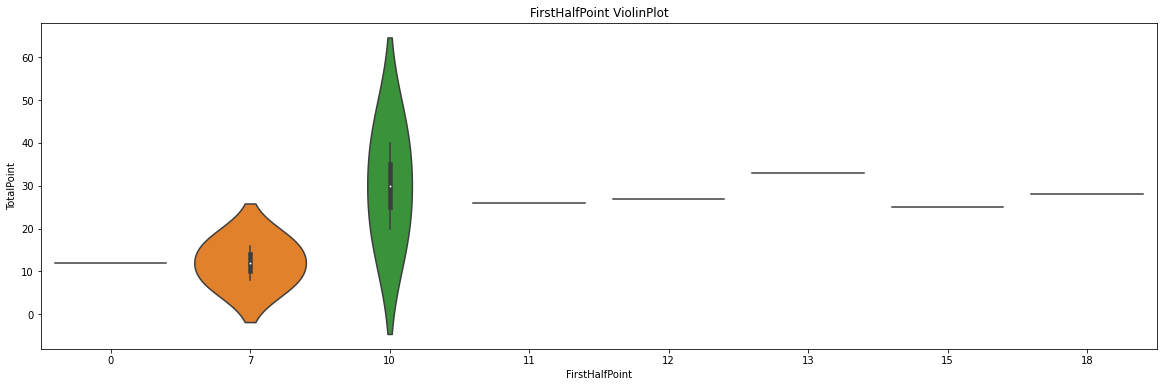

In [67]:
plt.figure(figsize = (20,6))
sns.violinplot(x = 'FirstHalfPoint', y ='TotalPoint', data = df_num).set_title('FirstHalfPoint ViolinPlot')
plt.show()

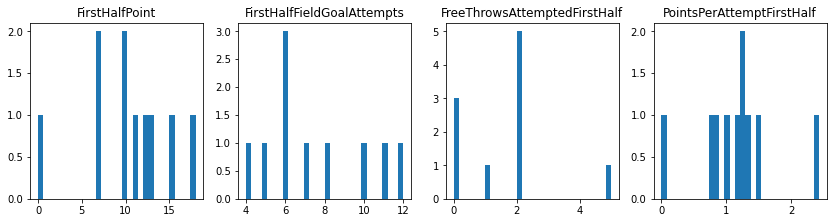

In [69]:
cols = list(X)
fig = plt.figure(figsize=(18, 11))
fig.tight_layout(pad=5.0)
for i in range(len(cols)):
    plt.subplot(3, 5, i+1)
    plt.hist(X[cols[i]], bins=30)
    plt.title(cols[i])

In [121]:

gnb = GaussianNB()
gnb_fit = gnb.fit(train_X, train_y)
gnb_predict = gnb_fit.predict(val_X)
gnb_predict
#cv = cross_val_score(gnb, X, y, cv = 2, scoring = 'r2')

array([40, 40], dtype=int64)